# Examining how geospatial data can help improve predicting housing prices
Group 9 - Julius Løve Fischer, Hans Chirstian Jul Lehmann & Kerem Yapici

## Importing packages and unzipping data from boliga.dk

In [1]:
import pandas as pd
import numpy as np
from numpy import NaN
#import requests
from datetime import date
#import time
#import math
#import os
#import ast
#import json
import matplotlib.pyplot as plt
#import tqdm
import seaborn as sns
#import folium
#import geopandas as gpd
#import fiona
#from shapely.geometry import Point
%matplotlib inline

In [2]:
houses = pd.read_csv('houses.csv')

column_selection = ['address', 'zipCode', 'price', 'soldDate', 'propertyType',
            'saleType', 'sqmPrice', 'rooms', 'size', 'buildYear', 'guid', 'latitude',
            'longitude', 'municipalityCode', 'city']

houses = houses[column_selection].query("saleType == 'Alm. Salg'") # select relevant columns and sale types
houses['unitId'] = houses['guid'].str.lower() # Convert to lower case for merging with bbr dataframe
houses['soldDate'] = pd.to_datetime(houses['soldDate'].astype(str)).dt.date
houses = houses.sort_values(by="soldDate", ascending = False) # Dataframe is not sorted by default as we have two query_lists
houses = houses.set_index('soldDate').drop('guid', axis=1)

houses

,address,zipCode,price,propertyType,saleType,sqmPrice,rooms,size,buildYear,latitude,longitude,municipalityCode,city,unitId
soldDate,,,,,,,,,,,,,,
2022-07-27,"Gyldenlakvej 27, 1. tv",2300,2340000,3,Alm. Salg,41052.633,2.0,57,1938,55.645130,12.612886,101,København S,f08ba307-5131-485f-8a9c-a51b53511aa3
2022-07-27,"Gammel Kongevej 165A, 1",1850,5995000,3,Alm. Salg,66611.110,3.0,90,2000,55.677700,12.535549,147,Frederiksberg C,5ddda144-2d9e-413d-9cbe-468522500a68
2022-07-27,"Rolfsvej 37, 2. th",2000,7887000,3,Alm. Salg,71054.055,4.0,111,1916,55.683937,12.531795,147,Frederiksberg,cf5a390d-4b0b-4f11-a79f-109e540864e0
2022-07-26,"Havneholmen 82, 2. th",1561,5200000,3,Alm. Salg,68421.055,2.0,76,2008,55.661070,12.564086,101,København V,31c9cf15-56cd-4e0c-8324-5e9f34bfd78b
2022-07-22,"Islands Brygge 24B, 4. tv",2300,7825000,3,Alm. Salg,74523.810,3.0,105,1910,55.663128,12.571215,101,København S,95e09d1f-dcf2-4e5c-abb4-fd3e753a7c3c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-01-02,"Lykkesholms Allé 10, 2. th",1902,1850000,3,Alm. Salg,22289.156,4.0,83,1876,55.676643,12.548173,147,Frederiksberg C,5e3fd65e-27a7-46df-9893-03284d76c75b
2000-01-02,"Lykkesholms Allé 10, 1",1902,1850000,3,Alm. Salg,14015.151,4.0,132,1876,55.676643,12.548173,147,Frederiksberg C,3df49d93-7b12-44bd-a75a-d6e61ed6972e
2000-01-02,"Lykkesholms Allé 10, 2. tv",1902,1850000,3,Alm. Salg,108823.530,1.0,17,1876,55.676643,12.548173,147,Frederiksberg C,1a503662-4e1b-4e37-a991-85e3f01789fc


In [4]:
# Reading the gzip file
bbr = pd.read_parquet('df.parquet.gzip')
unpack_values = ['bbrInfoBox', 'buildingInfo', 'unitInfo']
for i in unpack_values:
    bbr = pd.concat([bbr, bbr[i].apply(ast.literal_eval).apply(pd.Series)], axis=1)
bbr = bbr.drop(unpack_values, axis=1)

In [5]:
####### GEM EVT. DEN HER FIL LOKALT SOM CSV-FIL, SÅ OG READ DEN, SÅ I IKKE SKAL KØRE HELE NOTEBOOKEN ######
boliga = pd.merge(houses, bbr, on='unitId', how='inner') # Inner merge to discard NaN's, if any

In [2]:
# Saving the merged file - will use this from now on
path = r'C:\Users\Kerem\Desktop'

boliga.to_csv(path +'/boliga.csv')

NameError: name 'boliga' is not defined

In [2]:
boliga = pd.read_csv(r'C:\Users\Kerem\Desktop' + '/boliga.csv')

In [3]:
pd.set_option('display.max_columns', None)

# getting a overview of data
boliga.describe()

# Column type
boliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88786 entries, 0 to 88785
Data columns (total 86 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          88786 non-null  int64  
 1   address                             88786 non-null  object 
 2   zipCode                             88786 non-null  int64  
 3   price                               88786 non-null  int64  
 4   propertyType                        88786 non-null  int64  
 5   saleType                            88786 non-null  object 
 6   sqmPrice                            88786 non-null  float64
 7   rooms                               88786 non-null  float64
 8   size                                88786 non-null  int64  
 9   buildYear                           88786 non-null  int64  
 10  latitude                            88786 non-null  float64
 11  longitude                           88786

## Data cleaning

In [6]:
# converting column types automatically
boliga.convert_dtypes().dtypes

# removing duplicate columns
boliga = boliga.drop(columns=['heatingCode.1', 'notes.1', 'roomsQuantity.1']).copy()


In [4]:
pd.set_option('display.max_rows', 100)
# replacing '-' with np.NaN
boliga.replace('-', np.NaN, inplace=True)

# This way, we can count the number of missing values per column;
boliga.isnull().sum() 

# addressFloor has 14417 missings

# as a share of total
share = boliga.isnull().sum(axis=0) * 100 / len(boliga)

# dropping columns with NaN share of >=20%
list = ['Unnamed: 0', 'conservationCode', 'conservationWorthy', 'drainCode', 'drainPermission', 'heatingCode', 
        'additionalHeatingSupplyCode', 'additionalOuterWallMaterial', 'additionalRoofMaterial', 'asbestosMaterial', 
        'energyCode', 'heatingInstallationCode', 'heatingSecondaryCode', 'usageCode']

#other non-relevant columns
non_relevant = ['accessAreaArea', 'area', 'areaBusiness','areaClosedCovered','areaLiving','areaOpenCovered','areaOther',
'areaRecorded', 'appliance', 'areaSocial', 'areaUnit','basementSize','buildInCarportArea','buildInGarageArea','buildingArea',
'buildingNumber', 'buildingUsage','buildInOuthouseArea','businessArea','carbageRoomArea','closedCoveredArea',
'conservatoryArea', 'constructionYear', 'coveredArea','floorDeviation','floorQuantity','livingArea','notes','objectStatus','openCoveredArea',
'otherArea','propertyCondemned', 'propertyUnitType', 'roomsBusinessQuantity','secureRoomArea','toiletCode']


# extending list with non-relevant
list.extend(non_relevant)

# dropping lists
boliga = boliga.drop(columns=list)

boliga


## Outliers

In [8]:
boliga[['sqmPrice']].describe()

,sqmPrice
count,8.878600e+04
mean,8.942583e+04
std,2.219185e+05
min,1.587302e+02
25%,2.845528e+04
50%,3.925234e+04
75%,5.333333e+04
max,7.744658e+06


<function matplotlib.pyplot.show(close=None, block=None)>

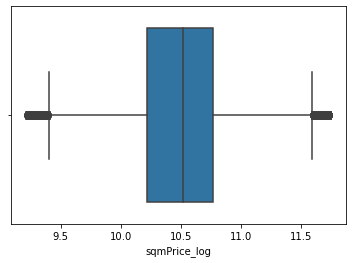

In [18]:
# checking sqmprice
boliga = boliga.loc[(boliga['sqmPrice']<=126000) & (boliga['sqmPrice']>=10000)]

#boliga[['sqmPrice']].describe()

# taking log
boliga['sqmPrice_log'] = np.log(boliga['sqmPrice'])

# plotting
sns.boxplot(x=boliga['sqmPrice_log'])
plt.show

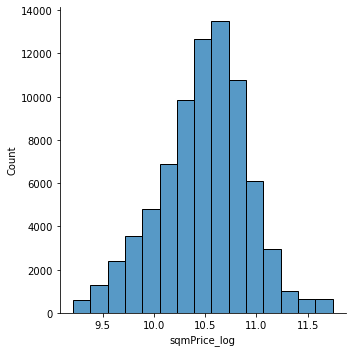

In [20]:
sns.displot(boliga['sqmPrice_log'], bins = 15, kde= False)
plt.show()

In [61]:

# to detect outliers, bins will be created for sqmPrice variable

np.round(boliga['sqmPrice'].describe(),2)

cuts = np.arange(0,140000, 10000) 
cats = pd.cut(boliga['sqmPrice'], cuts)
cats.value_counts()/boliga['sqmPrice'].count()

(30000, 40000]      0.271265
(40000, 50000]      0.220690
(20000, 30000]      0.205342
(50000, 60000]      0.111966
(10000, 20000]      0.108503
(60000, 70000]      0.050314
(70000, 80000]      0.017652
(80000, 90000]      0.008683
(90000, 100000]     0.005585
(0, 10000]          0.000000
(100000, 110000]    0.000000
(110000, 120000]    0.000000
(120000, 130000]    0.000000
Name: sqmPrice, dtype: float64

## Descriptive analysis

c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Kerem\anaconda3\envs\isds\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: 

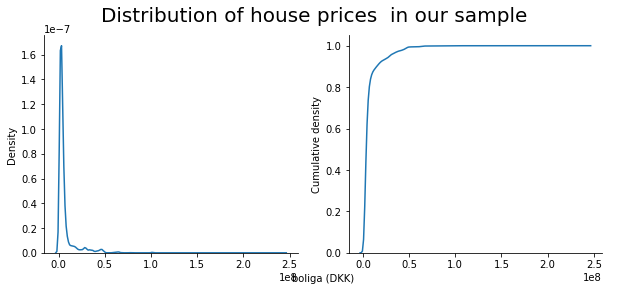

In [8]:
# Creating density plot over houseprices 
f,ax = plt.subplots(1,2, sharex=True, figsize=(10,4))

### BEGIN SOLUTION
sns.distplot(boliga['price'],hist=True, bins=range(12), ax=ax[0])
ax[0].set(ylabel='Density', xlabel=(None))

sns.distplot(boliga['price'], bins=range(12), hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, ax=ax[1]) 
ax[1].set(ylabel='Cumulative density', xlabel=(None))

sns.despine()

plt.suptitle("Distribution of house prices  in our sample", size=20)
### END SOLUTION

f.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("boliga (DKK)")

plt.grid(False)

#sns.set_style('whitegrid')
#sns.kdeplot(np.array(boliga['price']), bw=0.5)

In [ ]:
cuts = np.arange(0, 80, 10) # range from 0 to 100 with 20 between
tb_cat = pd.cut(boliga['total_bill'], cuts) # cut into categorical data
print(tb_cat.value_counts().sort_index())
print(round(tb_cat.value_counts().sort_index()/len(boliga['total_bill'])*100,2))


In [ ]:
sns.set_theme()
